In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<h1 align=center><font size = 5 color='blue'>Chargement et préparation des données</font></h1>

In [ ]:
data=pd.read_csv('../data/yelp-text-by-stars.csv',sep=';',encoding="ISO-8859-1")
data.head(3)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...


In [ ]:
corpus=data.iloc[:,1].values
Y=data.iloc[:,0].values

In [ ]:
print('Taille du corpus : {0:d}'.format(len(corpus)))

Taille du corpus : 47371


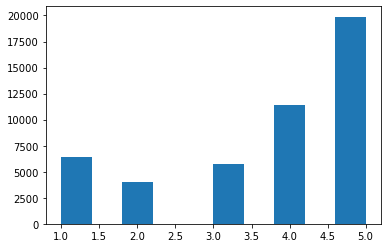

In [ ]:
plt.hist(Y)
plt.show()

### Découpage de la base en Apprentissage et test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
corpus_train,corpus_test,y_train,y_test=train_test_split(corpus,Y,test_size=0.33,shuffle=True,random_state=1)

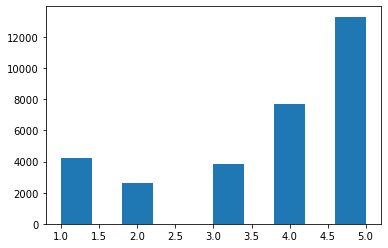

In [ ]:
plt.hist(y_train)
plt.show()

<h1 align=center><font size = 5 color='blue'>Création des modèles d'apprentissage</font></h1>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix

In [ ]:
algos = {
'RF' : RandomForestRegressor(n_estimators=50,random_state=1,n_jobs=-1),
 'KNN' : KNeighborsRegressor(n_neighbors=5,n_jobs=-1,metric='cosine'),
  'MLP' : MLPRegressor(hidden_layer_sizes=(20,10),max_iter=200,random_state=1,alpha=0.001)
}

def run_models (X_train,Y_train,X_test,Y_test,algos):
    for algo_name in algos:
        model=algos[algo_name]
        model.fit(X_train,Y_train)
        prediction=model.predict(X_test)
        prediction[prediction<1]=1
        prediction[prediction>5]=5
        MAE=mean_absolute_error(Y_test,prediction)
        ACC=accuracy_score(Y_test,np.round(prediction))

        print('################## {0} #############'.format(algo_name))
        print('MAE = {0:.3f}, Accuracy ={1:.3f}'.format(MAE,ACC))
        display(confusion_matrix(Y_test,np.round(prediction)))
        print()


<h1 align=center><font size = 5 color='blue'>Vectorisation des textes par TF-IDF</font></h1>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [ ]:
corpus_train[0]

'Nice shop, easy to get an appointment.\rLady/girl was professional friendly and actually had a great conversation during the cut.  Style was perfect and service was excellent.'

In [ ]:
from sklearn.feature_extraction import _stop_words
_stop_words.ENGLISH_STOP_WORDS
new_stop_words=_stop_words.ENGLISH_STOP_WORDS.union(frozenset({'30','40'}))



In [ ]:
#CV=CountVectorizer(max_features=1000,stop_words='english')
#CV.fit(corpus_train)
#corpus_train_CV=CV.transform(corpus_train)
#TFIDF=TfidfTransformer()
#TFIDF.fit(corpus_train_CV)
#corpus_train_tfidf=TFIDF.transform(corpus_train_CV)


TFIDF=TfidfVectorizer(max_features=1000,stop_words='english')
TFIDF.fit(corpus_train)
corpus_train_tfidf=TFIDF.transform(corpus_train)
corpus_test_tfidf=TFIDF.transform(corpus_test)


In [ ]:
corpus_train_tfidf[0].toarray()

In [ ]:
TFIDF.vocabulary_

{'nice': 560,
 'shop': 776,
 'easy': 254,
 'appointment': 33,
 'lady': 453,
 'girl': 347,
 'professional': 673,
 'friendly': 330,
 'actually': 17,
 'great': 362,
 'cut': 198,
 'style': 843,
 'perfect': 623,
 'service': 770,
 'excellent': 277,
 'today': 887,
 'time': 882,
 'awesome': 53,
 'experience': 284,
 'definitely': 212,
 'going': 355,
 'addition': 20,
 'bbq': 66,
 'favorite': 300,
 'foods': 319,
 'happy': 379,
 'try': 908,
 'new': 559,
 'spot': 818,
 'area': 35,
 'stand': 821,
 'local': 478,
 'don': 241,
 'let': 463,
 'location': 480,
 'parking': 612,
 'lot': 490,
 'warm': 953,
 'mexican': 524,
 'restaurant': 706,
 'inside': 422,
 'fancy': 296,
 'clean': 149,
 'simple': 787,
 'long': 483,
 'tables': 855,
 'want': 951,
 'enjoy': 265,
 'did': 222,
 'wanted': 952,
 'home': 396,
 'husband': 410,
 'meat': 516,
 'special': 811,
 'comes': 163,
 'sides': 784,
 'priced': 665,
 '11': 3,
 '99': 13,
 'reasonable': 694,
 'quality': 678,
 'food': 318,
 'included': 416,
 'added': 19,
 'corn': 1

In [ ]:
TFIDF.get_feature_names()[17]

'actually'

In [ ]:
run_models (corpus_train_tfidf.toarray(),y_train,corpus_test_tfidf.toarray(),y_test,algos)

################## RF #############
MAE = 0.735, Accuracy =0.457


array([[ 587,  841,  472,  221,   23],
       [  78,  405,  514,  337,   44],
       [  34,  213,  722,  822,   96],
       [   8,  104,  612, 2217,  720],
       [   8,  104,  456, 2779, 3216]])


################## KNN #############
MAE = 0.918, Accuracy =0.361


array([[ 271,  632,  707,  440,   94],
       [  62,  242,  507,  496,   71],
       [  28,  153,  600,  931,  175],
       [   9,  105,  756, 2049,  742],
       [  16,  133,  921, 3013, 2480]])


################## MLP #############
MAE = 0.752, Accuracy =0.507


array([[1250,  445,  202,  141,  106],
       [ 371,  361,  302,  224,  120],
       [ 167,  339,  468,  589,  324],
       [ 114,  255,  511, 1311, 1470],
       [ 141,  234,  377, 1270, 4541]])

In [ ]:
from sklearn.feature_extraction import _stop_words
new_stop_words=_stop_words.ENGLISH_STOP_WORDS.union(frozenset({'30','40'}))

<h1 align=center><font size = 5 color='blue'>Sélection de mots clés pertinents</font></h1>

['great' 'worst' 'told' 'amazing' 'best' 'rude' 'horrible' 'delicious'
 'love' 'good' 'friendly' 'terrible' 'awesome' 'excellent' 'asked'
 'highly' 'definitely' 'said' 'ok' 'food' 'bland' 'nice' 'bad' 'place'
 'poor' 'just' 'wasn' 'perfect' 'don' 'minutes']


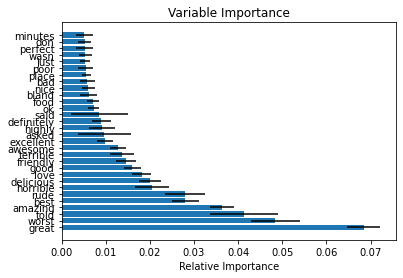

In [ ]:
X_array=corpus_train_tfidf.toarray()
features =np.asarray(TFIDF.get_feature_names())
clf=RandomForestRegressor(n_estimators=500,random_state=1,n_jobs=-1)
nb_best=30

clf.fit(X_array, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
print(features[sorted_idx][:nb_best])
padding = np.arange(nb_best) + 0.5
plt.barh(padding, importances[sorted_idx][:nb_best],xerr=std[sorted_idx][:nb_best], align='center')
plt.yticks(padding, features[sorted_idx][:nb_best])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

<h1 align=center><font size = 5 color='blue'>Vectorisation des textes par SVD</font></h1>

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
SVD=TruncatedSVD(n_components=100)
SVD.fit(corpus_train_tfidf)
corpus_train_SVD=SVD.transform(corpus_train_tfidf)
corpus_test_SVD=SVD.transform(corpus_test_tfidf)

In [ ]:
corpus_train_SVD.shape

(31738, 100)

In [ ]:
run_models (corpus_train_SVD,y_train,corpus_test_SVD,y_test,algos)

################## RF #############
MAE = 0.793, Accuracy =0.409


array([[ 263,  924,  723,  210,   24],
       [  36,  324,  682,  312,   24],
       [   6,  162,  865,  784,   70],
       [   3,   73,  829, 2225,  531],
       [   6,   77,  706, 3054, 2720]])


################## KNN #############
MAE = 0.874, Accuracy =0.389


array([[ 503,  745,  579,  290,   27],
       [  94,  325,  528,  373,   58],
       [  40,  258,  752,  718,  119],
       [  27,  181, 1012, 1845,  596],
       [  33,  236, 1025, 2616, 2653]])


################## MLP #############
MAE = 0.667, Accuracy =0.516


array([[ 886,  759,  312,  157,   30],
       [ 153,  500,  434,  258,   33],
       [  35,  302,  673,  777,  100],
       [  15,  136,  598, 2067,  845],
       [  15,  113,  372, 2120, 3943]])

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Concept #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(SVD, TFIDF.get_feature_names(), 10)

Concept #0: food good great place service time like just really ve
Concept #1: food good great chicken delicious fresh place restaurant menu atmosphere
Concept #2: great service staff friendly love recommend amazing highly place best
Concept #3: pizza love place best like ve cheese amazing crust try
Concept #4: pizza service great customer crust order ordered cheese car sauce
Concept #5: good pizza really pretty service nice place room food bar
Concept #6: great room bar nice burger hotel night beer got fries
Concept #7: good chicken recommend car friendly highly really work best job
Concept #8: staff friendly room hotel nice vegas restaurant best pizza food
Concept #9: staff friendly love place order helpful nice chicken minutes super
Concept #10: amazing good time burger recommend definitely bar fries best highly
Concept #11: sushi place recommend service rolls roll highly definitely nice came
Concept #12: love service burger customer room hotel coffee und fries excellent
Concept #13

<h1 align=center><font size = 5 color='blue'>Vectorisation par Word2Vec entrainé</font></h1>

In [ ]:
## get word2vec for each sentences by using average word embeddings
def word2vec_generator(texts,model,vector_size):
    dict_word2vec = {}
    for index, word_list in enumerate(texts):
        arr = np.array([0.0 for i in range(0, vector_size)])
        nb_word=0
        for word in word_list:
            try:
                arr += model[word]
                nb_word=nb_word+1
            except KeyError:
                continue
        if(len(word_list) == 0):
            dict_word2vec[index] = arr
        else:
            dict_word2vec[index] = arr / nb_word
    df_word2vec = pd.DataFrame(dict_word2vec).T
    return df_word2vec

In [ ]:
import gensim

In [ ]:
type(corpus_train)

numpy.ndarray

In [ ]:
type(corpus_train)

numpy.ndarray

In [ ]:
corpus_train_tokens = pd.Series(corpus_train).apply(lambda line : gensim.utils.simple_preprocess((line)))
corpus_test_tokens = pd.Series(corpus_test).apply(lambda line : gensim.utils.simple_preprocess((line)))

In [ ]:
model_wv_entraine=gensim.models.Word2Vec.load('../models/Word2vec_entraine.h5')

In [ ]:
vector_size=model_wv_entraine.vector_size
corpus_train_wv_entraine=word2vec_generator(corpus_train_tokens,model_wv_entraine.wv,vector_size)
corpus_test_wv_entraine=word2vec_generator(corpus_test_tokens,model_wv_entraine.wv,vector_size)

In [ ]:
corpus_train_wv_entraine.iloc[0,:]

0     0.870093
1     0.699377
2     0.029794
3     0.000044
4    -0.713013
        ...   
95    0.089514
96   -0.478499
97    0.289783
98    0.278444
99    0.149323
Name: 0, Length: 100, dtype: float64

In [ ]:
corpus_train[0]

'Nice shop, easy to get an appointment.\rLady/girl was professional friendly and actually had a great conversation during the cut.  Style was perfect and service was excellent.'

In [ ]:
corpus_train_tokens[0]

['nice',
 'shop',
 'easy',
 'to',
 'get',
 'an',
 'appointment',
 'lady',
 'girl',
 'was',
 'professional',
 'friendly',
 'and',
 'actually',
 'had',
 'great',
 'conversation',
 'during',
 'the',
 'cut',
 'style',
 'was',
 'perfect',
 'and',
 'service',
 'was',
 'excellent']

In [ ]:
run_models (corpus_train_wv_entraine,y_train,corpus_test_wv_entraine,y_test,algos)

################## RF #############
MAE = 0.869, Accuracy =0.357


array([[  74,  705, 1076,  280,    9],
       [  13,  221,  774,  363,    7],
       [   4,  107,  893,  865,   18],
       [   1,   52,  894, 2419,  295],
       [   0,   46,  832, 3715, 1970]])


################## KNN #############
MAE = 0.821, Accuracy =0.424


array([[ 386,  680,  595,  419,   64],
       [  76,  246,  469,  501,   86],
       [  37,  135,  551,  990,  174],
       [  14,   96,  546, 2124,  881],
       [  20,  120,  508, 2587, 3328]])


################## MLP #############
MAE = 0.640, Accuracy =0.532


array([[ 846,  762,  360,  141,   35],
       [ 150,  457,  487,  253,   31],
       [  50,  259,  670,  796,  112],
       [  22,  153,  536, 1867, 1083],
       [  19,   92,  342, 1639, 4471]])

<h1 align=center><font size = 5 color='blue'>Vectorisation Word2Vec pre-entrainé de Google</font></h1>

In [ ]:
model_wv_google=gensim.models.KeyedVectors.load_word2vec_format('../models/GoogleNews-vectors-negative300.bin'
                                                                , binary=True)

In [ ]:
model_wv_google.vector_size

300

In [ ]:
len(model_wv_google.index_to_key)

3000000

In [ ]:
#corpus_train_tokens[0]
vector_size=model_wv_google.vector_size
corpus_train_wv_google=word2vec_generator(corpus_train_tokens,model_wv_google,vector_size)
corpus_test_wv_google=word2vec_generator(corpus_test_tokens,model_wv_google,vector_size)

In [ ]:
run_models(corpus_train_wv_google,y_train,corpus_test_wv_google,y_test,algos)

################## RF #############
MAE = 0.811, Accuracy =0.381


array([[ 258,  839,  826,  213,    8],
       [  35,  272,  731,  337,    3],
       [  15,  124,  817,  905,   26],
       [   2,   58,  714, 2530,  357],
       [   4,   80,  614, 3793, 2072]])


################## KNN #############
MAE = 0.832, Accuracy =0.394


array([[ 510,  839,  578,  206,   11],
       [  85,  369,  569,  327,   28],
       [  36,  199,  713,  873,   66],
       [  19,  141,  767, 2269,  465],
       [  27,  226,  866, 3147, 2297]])


################## MLP #############
MAE = 0.612, Accuracy =0.537


array([[ 765,  976,  293,  100,   10],
       [ 105,  607,  410,  239,   17],
       [  26,  315,  620,  845,   81],
       [  12,  114,  477, 2165,  893],
       [   9,   68,  267, 1978, 4241]])

<h1 align=center><font size = 5 color='blue'>Prédiction par LSTM</font></h1>

In [ ]:
def to_sequence(index, text):
    indexes = [index[word] for word in text if word in index]
    return indexes

word2idx = {word: idx for idx, word in enumerate(model_wv_google.index_to_key)}
X_train_sequences = [to_sequence(word2idx, x) for x in corpus_train_tokens]
X_test_sequences = [to_sequence(word2idx, x) for x in corpus_test_tokens]

print(corpus_train_tokens.values[0])
print(X_train_sequences[0])

['nice', 'shop', 'easy', 'to', 'get', 'an', 'appointment', 'lady', 'girl', 'was', 'professional', 'friendly', 'and', 'actually', 'had', 'great', 'conversation', 'during', 'the', 'cut', 'style', 'was', 'perfect', 'and', 'service', 'was', 'excellent']
[1535, 2399, 993, 91, 27, 3369, 5582, 1408, 10, 1322, 2758, 905, 35, 267, 3399, 135, 11, 529, 1458, 10, 1570, 277, 10, 2376]


In [ ]:
type(X_train_sequences)

list

In [ ]:
max([len(X_train_sequences[i]) for i in range(len(X_train_sequences))])

859

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_SEQ_LENGHT=50
N_FEATURES = len(model_wv_google.index_to_key)
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

[3000000 3000000 3000000 3000000 3000000 3000000 3000000 3000000 3000000
 3000000 3000000 3000000 3000000 3000000 3000000 3000000 3000000 3000000
 3000000 3000000 3000000 3000000 3000000 3000000 3000000 3000000    1535
    2399     993      91      27    3369    5582    1408      10    1322
    2758     905      35     267    3399     135      11     529    1458
      10    1570     277      10    2376]


In [ ]:
EMBEDDINGS_LEN = model_wv_google.vector_size
embeddings_index = np.zeros((len(model_wv_google.index_to_key)+1, EMBEDDINGS_LEN))
embeddings_index.shape


(3000001, 300)

In [ ]:
EMBEDDINGS_LEN = model_wv_google.vector_size
embeddings_index = np.zeros((len(model_wv_google.index_to_key)+1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = model_wv_google[word]
        embeddings_index[idx] = embedding
    except:
        pass

print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)

EMBEDDINGS_LEN= 300


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense,LSTM


model_lstm = Sequential()
model_lstm.add(Embedding(len(model_wv_google.key_to_index)+1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    trainable=False))

#model_Bilstm.add(Embedding(30000,
#                    300,  # Embedding size
#                    input_length=50,
#                    trainable=True))

model_lstm.add(LSTM(300, dropout=0.2,return_sequences=True))
model_lstm.add(LSTM(100, dropout=0.2))

#model_lstm.add(Bidirectional(LSTM(128,recurrent_dropout=0.2, return_sequences=True),merge_mode='concat'))
#model_lstm.add(Bidirectional(LSTM(128,recurrent_dropout=0.2, return_sequences=False),merge_mode='concat'))


model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model_lstm.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         900000300 
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 900,721,801
Trainable params: 721,501
Non-trainable params: 900,000,300
_________________________________________________________________


In [ ]:
history = model_lstm.fit(X_train_sequences, y_train, epochs=10, batch_size=128, verbose=1,validation_split=0.1)

Epoch 1/10
224/224 [==============================] - 41s 181ms/step - loss: 0.9844 - mean_absolute_error: 0.9844 - val_loss: 0.7794 - val_mean_absolute_error: 0.7794
Epoch 2/10
224/224 [==============================] - 46s 208ms/step - loss: 0.7369 - mean_absolute_error: 0.7369 - val_loss: 0.6921 - val_mean_absolute_error: 0.6921
Epoch 3/10
224/224 [==============================] - 47s 211ms/step - loss: 0.6896 - mean_absolute_error: 0.6896 - val_loss: 0.7162 - val_mean_absolute_error: 0.7162
Epoch 4/10
224/224 [==============================] - 49s 217ms/step - loss: 0.6462 - mean_absolute_error: 0.6462 - val_loss: 0.6086 - val_mean_absolute_error: 0.6086
Epoch 5/10
224/224 [==============================] - 102s 457ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - val_loss: 0.5980 - val_mean_absolute_error: 0.5980
Epoch 6/10
224/224 [==============================] - 82s 369ms/step - loss: 0.5906 - mean_absolute_error: 0.5906 - val_loss: 0.6311 - val_mean_absolute_error: 0.63

In [ ]:
scores_lstm = model_lstm.evaluate(X_test_sequences, y_test, verbose=1)

489/489 [==============================] - 35s 71ms/step - loss: 0.5639 - mean_absolute_error: 0.5639


In [ ]:
prediction=model_lstm.predict(X_test_sequences)
prediction[prediction<1]=1
prediction[prediction>5]=5
ACC=accuracy_score(y_test,np.round(prediction))
MAE=mean_absolute_error(y_test,prediction)
print('For LSTM MAE = {0:.3f}, Accuracy ={1:.3f}'.format(MAE,ACC))
display(confusion_matrix(y_test,np.round(prediction)))

For LSTM MAE = 0.562, Accuracy =0.582


array([[1159,  518,  227,  159,   81],
       [ 225,  494,  353,  242,   64],
       [  50,  326,  522,  779,  210],
       [  22,  108,  336, 1773, 1422],
       [  13,   42,  163, 1198, 5147]])

## Utilisation de la sortie des LSTM dans d'autres modèles supervisés

In [ ]:
model_lstm.layers

In [ ]:
from keras.models import Model
Model_rf = Model(inputs=model_lstm.inputs, outputs=model_lstm.layers[1].output)
Model_rf.save('../models/model_lstm_features.h5')
corpus_train_lstm = Model_rf.predict(X_train_sequences)
corpus_test_lstm = Model_rf.predict(X_test_sequences)


In [ ]:
corpus_train_lstm.shape

(31738, 300)

In [ ]:
run_models(corpus_train_lstm,y_train,corpus_test_lstm,y_test,algos)

################## RF #############
MAE = 0.603, Accuracy =0.544


array([[ 986,  737,  275,  122,   24],
       [ 150,  562,  451,  199,   16],
       [  35,  319,  664,  777,   92],
       [  14,  127,  482, 2209,  829],
       [  12,   62,  262, 2136, 4091]])


################## KNN #############
MAE = 0.606, Accuracy =0.551


array([[1122,  584,  242,  143,   53],
       [ 228,  503,  389,  216,   42],
       [  68,  307,  601,  742,  169],
       [  31,  115,  497, 1903, 1115],
       [  24,   66,  246, 1738, 4489]])


################## MLP #############
MAE = 0.615, Accuracy =0.552


array([[1031,  663,  284,  134,   32],
       [ 211,  473,  462,  212,   20],
       [  65,  278,  668,  788,   88],
       [  28,   99,  481, 2152,  901],
       [  19,   69,  213, 1952, 4310]])